In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# load the dataset
df=pd.read_csv('merged_df.csv')
df.head()

C:\Users\polar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Service:RDT-ID,date,Service:Type,Service:Company,Service:Train number,Service:Completely cancelled,Service:Partly cancelled,Service:Maximum delay,Stop:RDT-ID,Stop:Station code,...,Stop:Departure time,Stop:Departure delay,Stop:Departure cancelled,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,12690865,2024-01-01,Intercity,NS,1410,False,False,0,114307596,SHL,...,2024-01-01T03:03:00+01:00,0.0,False,8.0,5.9,9.2,6.4,224.0,31.2,1000.0
1,12690865,2024-01-01,Intercity,NS,1410,False,False,0,114307597,ASS,...,2024-01-01T03:12:00+01:00,0.0,False,8.0,5.9,9.2,6.4,224.0,31.2,1000.0
2,12690865,2024-01-01,Intercity,NS,1410,False,False,0,114307598,ASD,...,2024-01-01T03:20:00+01:00,2.0,False,8.0,5.9,9.2,6.4,224.0,31.2,1000.0
3,12690865,2024-01-01,Intercity,NS,1410,False,False,0,114307599,ASB,...,2024-01-01T03:31:00+01:00,2.0,False,8.0,5.9,9.2,6.4,224.0,31.2,1000.0
4,12690867,2024-01-01,Intercity,NS,1409,False,False,0,114307611,ASB,...,2024-01-01T02:33:00+01:00,3.0,False,8.0,5.9,9.2,6.4,224.0,31.2,1000.0


In [3]:
df.index = df.date

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16687752 entries, 2024-01-01 to 2024-12-31
Data columns (total 24 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Service:RDT-ID                int64  
 1   date                          object 
 2   Service:Type                  object 
 3   Service:Company               object 
 4   Service:Train number          int64  
 5   Service:Completely cancelled  bool   
 6   Service:Partly cancelled      bool   
 7   Service:Maximum delay         int64  
 8   Stop:RDT-ID                   int64  
 9   Stop:Station code             object 
 10  Stop:Station name             object 
 11  Stop:Arrival time             object 
 12  Stop:Arrival delay            float64
 13  Stop:Arrival cancelled        bool   
 14  Stop:Departure time           object 
 15  Stop:Departure delay          float64
 16  Stop:Departure cancelled      bool   
 17  tavg                          float64
 18  tmin          

In [5]:
df['Total Delay'] = df['Stop:Departure delay'] + df['Stop:Arrival delay']

In [41]:
df['Service Cancelled'] = df['Service:Completely cancelled'] | df['Service:Partly cancelled'] | df['Stop:Arrival cancelled'] | df['Stop:Departure cancelled']

In [42]:

date_range_start = df.index.min()
date_range_end = df.index.max()

print(f"The range of dates is from {date_range_start} to {date_range_end}.")


The range of dates is from 2024-01-01 to 2024-12-31.


In [43]:
cancell_df = df[['Service Cancelled', 'Total Delay', 'Stop:Station code', 'Service:Train number', 'tmin', 'tmax', 'wdir',
                              'wspd', 'prcp', 'pres']]

In [44]:
filtered_delays = cancell_df[(cancell_df['Total Delay'] <= 30)]

In [45]:
sampled_df =filtered_delays #filtered_delays.sample(frac=0.1, random_state=42)

In [46]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16588259 entries, 2024-01-01 to 2024-12-31
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Service Cancelled     bool   
 1   Total Delay           float64
 2   Stop:Station code     object 
 3   Service:Train number  int64  
 4   tmin                  float64
 5   tmax                  float64
 6   wdir                  float64
 7   wspd                  float64
 8   prcp                  float64
 9   pres                  float64
dtypes: bool(1), float64(7), int64(1), object(1)
memory usage: 1.3+ GB


In [47]:
# Frequency encoding for 'Vict Descent'
frequency_map_Stop = sampled_df['Stop:Station code'].value_counts(normalize=True)
sampled_df['Station Codes'] = sampled_df['Stop:Station code'].map(frequency_map_Stop)

C:\Users\polar\AppData\Local\Temp\ipykernel_25304\1234445062.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df['Station Codes'] = sampled_df['Stop:Station code'].map(frequency_map_Stop)


In [48]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
df_scaled = pd.DataFrame(scaler.fit_transform(sampled_df[['Service Cancelled','Total Delay','Station Codes', 
                                                          'tmin', 'tmax','Service:Train number',
                                'wdir', 'wspd', 'prcp', 'pres']]), columns=sampled_df[['Service Cancelled', 
                             'Total Delay','Station Codes','Service:Train number', 'tmin', 'tmax', 'wdir', 'wspd', 'prcp', 'pres']].columns, 
                        index=sampled_df.index )

In [49]:
df_scaled.head()

,Service Cancelled,Total Delay,Station Codes,Service:Train number,tmin,tmax,wdir,wspd,prcp,pres
date,,,,,,,,,,
2024-01-01,0.0,0.000000,0.742051,0.505085,0.307471,0.001427,0.623955,0.635965,0.120075,0.314711
2024-01-01,0.0,0.000000,0.955886,0.505085,0.307471,0.001427,0.623955,0.635965,0.120075,0.314711
2024-01-01,0.0,0.100000,0.453080,0.505085,0.307471,0.001427,0.623955,0.635965,0.120075,0.314711
2024-01-01,0.0,0.133333,0.337156,0.505085,0.307471,0.001427,0.623955,0.635965,0.120075,0.314711
2024-01-01,0.0,0.200000,0.337156,0.505085,0.307471,0.001426,0.623955,0.635965,0.120075,0.314711


In [50]:
df_scaled['Service Cancelled'].value_counts()


Service Cancelled
0.0    15107834
1.0     1480425
Name: count, dtype: int64

In [51]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = df_scaled[df_scaled['Service Cancelled'] == False]
minority_class = df_scaled[df_scaled['Service Cancelled'] == True]

# Ensure majority_class actually has more samples
if len(majority_class) < len(minority_class):
    majority_class, minority_class = minority_class, majority_class

# Downsample majority class (keep original indices)
majority_downsampled = resample(
    majority_class,
    replace=False,
    n_samples=len(minority_class),
    random_state=42
)

# Combine minority and downsampled majority
df_balanced = pd.concat([minority_class, majority_downsampled])

# Shuffle the dataframe, keeping original index
df_balanced = df_balanced.sample(frac=1, random_state=42)




In [52]:
df_sorted=df_balanced.sort_index()
df_sorted.head()

,Service Cancelled,Total Delay,Station Codes,Service:Train number,tmin,tmax,wdir,wspd,prcp,pres
date,,,,,,,,,,
2024-01-01,0.0,0.0,0.273651,0.481356,0.284483,0.031324,0.601671,0.467105,0.326454,0.294227
2024-01-01,1.0,0.0,0.287102,0.522034,0.304598,0.032887,0.596100,0.392544,0.193246,0.331471
2024-01-01,0.0,0.0,0.237590,0.505085,0.307471,0.004731,0.623955,0.635965,0.120075,0.314711
2024-01-01,0.0,0.0,0.760967,0.498305,0.290230,0.032830,0.584958,0.491228,0.043152,0.344507
2024-01-01,0.0,0.0,0.587954,0.481356,0.284483,0.003730,0.601671,0.467105,0.326454,0.294227


In [53]:
df_sorted['Service Cancelled'].value_counts()

Service Cancelled
0.0    1480425
1.0    1480425
Name: count, dtype: int64

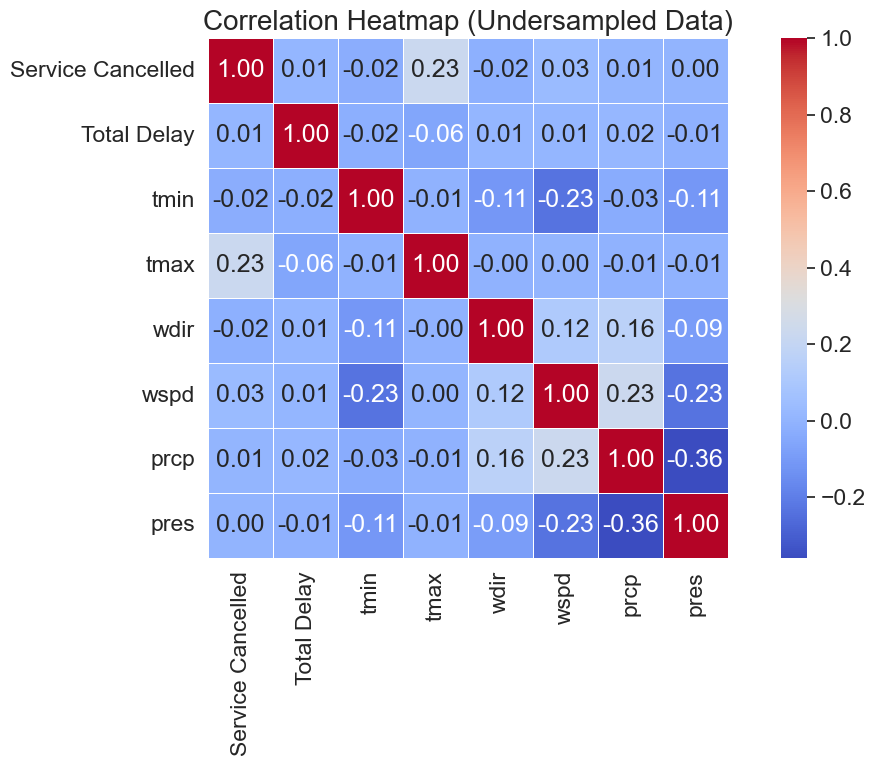

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the selected columns
selected_columns = ['Service Cancelled','Total Delay', 'tmin', 'tmax', 'wdir', 'wspd', 'prcp', 'pres']
corr_matrix = df_sorted[selected_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.5)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True)
plt.title("Correlation Heatmap (Undersampled Data)", fontsize=20)
plt.tight_layout()
plt.savefig('Corr_Matrix.png', bbox_inches='tight')
plt.show()


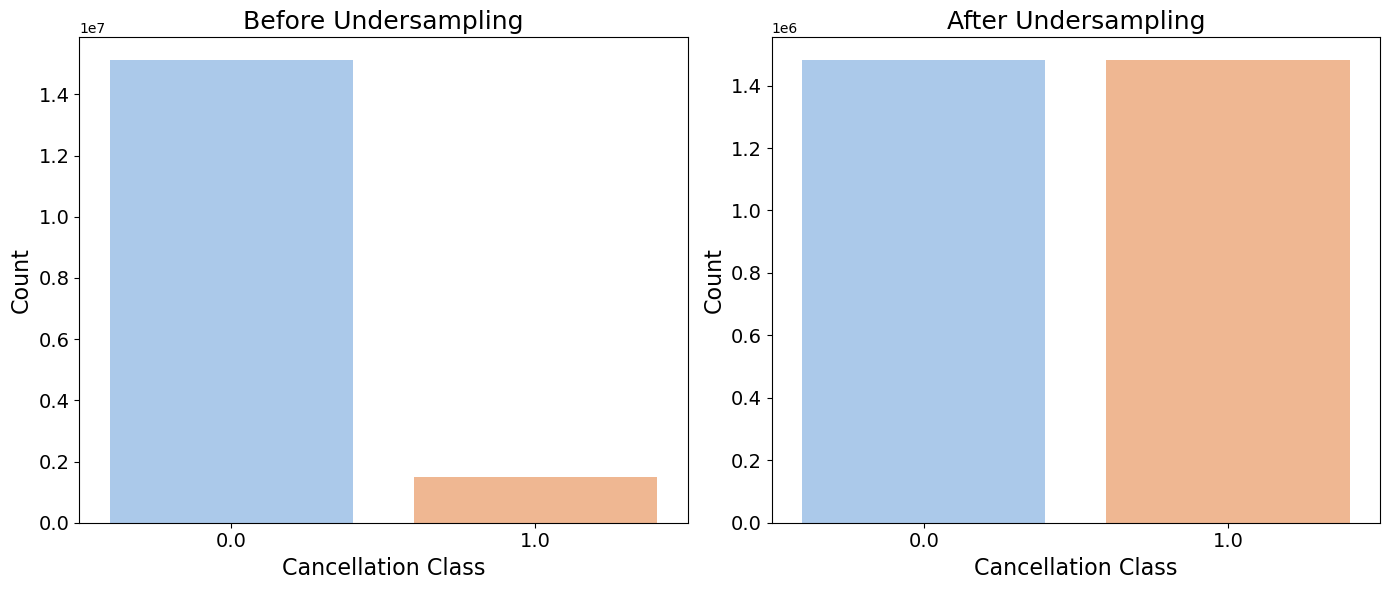

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


target_column = 'Service Cancelled'

# Create the plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Common styling parameters
title_fontsize = 18
label_fontsize = 16
tick_fontsize = 14

# Before undersampling
sns.countplot(x=target_column, data=df_scaled, ax=axes[0], palette='pastel')
axes[0].set_title('Before Undersampling', fontsize=title_fontsize)
axes[0].set_xlabel('Cancellation Class', fontsize=label_fontsize)
axes[0].set_ylabel('Count', fontsize=label_fontsize)
axes[0].tick_params(axis='both', labelsize=tick_fontsize)

# After undersampling
sns.countplot(x=target_column, data=df_sorted, ax=axes[1], palette='pastel')
axes[1].set_title('After Undersampling', fontsize=title_fontsize)
axes[1].set_xlabel('Cancellation Class', fontsize=label_fontsize)
axes[1].set_ylabel('Count', fontsize=label_fontsize)
axes[1].tick_params(axis='both', labelsize=tick_fontsize)

plt.tight_layout()
plt.savefig('balanced_impbalanced.png', bbox_inches='tight')
plt.show()


In [60]:
df_sorted.to_csv('df_cancellations.csv', index=True)

In [54]:
# Split into train and test sets
df_sorted.index = pd.to_datetime(df_sorted.index)
# Specify the cutoff date (last day of November 2024)
train_end_date = pd.Timestamp('2024-10-30')

# Split the DataFrame
train = df_sorted[df_sorted.index <= train_end_date]
test = df_sorted[df_sorted.index > train_end_date]

# Output the first few rows of the splits
print("Training set:")
print(train.head())

print("\nTesting set:")
print(test.head())


Training set:
            Service Cancelled  Total Delay  Station Codes  \
date                                                        
2024-01-01                0.0          0.0       0.273651   
2024-01-01                1.0          0.0       0.287102   
2024-01-01                0.0          0.0       0.237590   
2024-01-01                0.0          0.0       0.760967   
2024-01-01                0.0          0.0       0.587954   

            Service:Train number      tmin      tmax      wdir      wspd  \
date                                                                       
2024-01-01              0.481356  0.284483  0.031324  0.601671  0.467105   
2024-01-01              0.522034  0.304598  0.032887  0.596100  0.392544   
2024-01-01              0.505085  0.307471  0.004731  0.623955  0.635965   
2024-01-01              0.498305  0.290230  0.032830  0.584958  0.491228   
2024-01-01              0.481356  0.284483  0.003730  0.601671  0.467105   

                prcp     

In [39]:
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 296068 entries, 2024-01-01 to 2024-12-31
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Service Cancelled     296068 non-null  float64
 1   Station Codes         296068 non-null  float64
 2   Service:Train number  296068 non-null  float64
 3   tmin                  296068 non-null  float64
 4   tmax                  296068 non-null  float64
 5   wdir                  296068 non-null  float64
 6   wspd                  296068 non-null  float64
 7   prcp                  296068 non-null  float64
 8   pres                  296068 non-null  float64
dtypes: float64(9)
memory usage: 22.6 MB


In [40]:
#This code run entirely using the university's resurces and the predictions are provided
#in the next cell as y_pred
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc

# Extract features (X) and target (y) from the training set
X_train = train.drop(columns='Service Cancelled')  # Features for training
y_train = train['Service Cancelled']  # Target variable for training

# Initialize the DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

# 1. Perform 5-fold cross-validation on the training set
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores and average
print(f"Cross-validation scores (on validation set): {cv_scores}")
print(f"Average cross-validation accuracy: {cv_scores.mean():.4f}")

# 2. Define hyperparameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# 3. Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# 4. Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print(f"\nBest Hyperparameters found by GridSearchCV: {grid_search.best_params_}")

# 5. Train the final model using the best hyperparameters from Grid Search
best_model = grid_search.best_estimator_

# 6. Evaluate the model on the test set
X_test = test.drop(columns='Service Cancelled')  # Features for testing
y_test = test['Service Cancelled']  # Target variable for testing

y_pred = best_model.predict(X_test)

# 7. Print the final performance on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"\nFinal accuracy on the test set: {accuracy:.4f}")

# Optional: Classification report for more details
print("\nClassification Report on the test set:")
print(classification_report(y_test, y_pred))

# Get predicted probabilities for class 1 (cancellation = 1)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

Cross-validation scores (on validation set): [0.58776405 0.61013789 0.610855   0.61402287 0.62281277]
Average cross-validation accuracy: 0.6091
Fitting 5 folds for each of 135 candidates, totalling 675 fits

Best Hyperparameters found by GridSearchCV: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}

Final accuracy on the test set: 0.6799

Classification Report on the test set:
              precision    recall  f1-score   support

         0.0       0.62      0.82      0.71     24347
         1.0       0.78      0.56      0.65     27688

    accuracy                           0.68     52035
   macro avg       0.70      0.69      0.68     52035
weighted avg       0.70      0.68      0.68     52035



In [66]:
#These are the predictions made through the previous Decision_Tree model
y_pred = pd.read_csv('predictions_DT.csv')

In [67]:
from sklearn.metrics import accuracy_score, classification_report
# 7. Print the final performance on the test set
# 6. Evaluate the model on the test set
X_test = test.drop(columns='Service Cancelled')  # Features for testing
y_test = test['Service Cancelled']  # Target variable for testing
y_test = y_test.iloc[1:]  # Remove the first row
accuracy = accuracy_score(y_test, y_pred)
print(f"\nFinal accuracy on the test set: {accuracy:.4f}")

# Optional: Classification report for more details
print("\nClassification Report on the test set:")
print(classification_report(y_test, y_pred))


Final accuracy on the test set: 0.7070

Classification Report on the test set:
              precision    recall  f1-score   support

         0.0       0.64      0.84      0.73    244218
         1.0       0.81      0.59      0.68    278506

    accuracy                           0.71    522724
   macro avg       0.72      0.71      0.71    522724
weighted avg       0.73      0.71      0.70    522724




Confusion Matrix:
[[204200  40018]
 [113118 165388]]


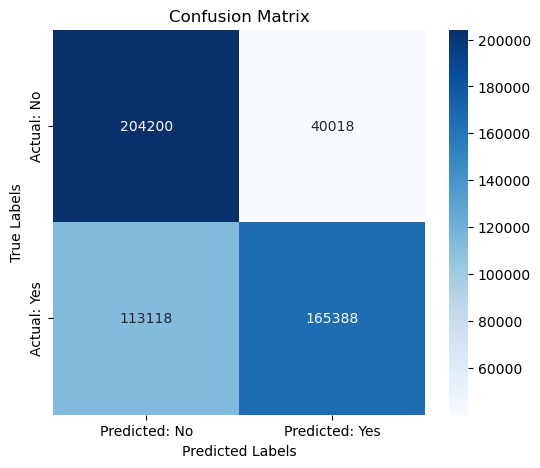

In [68]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("\nConfusion Matrix:")
print(cm)

# Optional: Visualizing the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Get feature importances
#This image is provided using the same code on the University's computer where the
#entire preoject executed
importances = best_model.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the feature importances in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("\nMost Important Features:")
print(feature_importances.head(10))

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Decision Tree - Feature Importance')
plt.savefig('Feature_Importance_DT.png', bbox_inches='tight')
plt.show()


In [43]:
#This code run entirely using the university's resurces and the predictions are provided
#in the next cell as rf_y_pred
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Extract features (X) and target (y) from the training set
X_train = train.drop(columns='Service Cancelled')  # Features for training
y_train = train['Service Cancelled']  # Target variable for training

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# 1. Perform 5-fold cross-validation on the Random Forest model
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores and average for Random Forest
print(f"\nRandom Forest - Cross-validation scores (on validation set): {rf_cv_scores}")
print(f"Random Forest - Average cross-validation accuracy: {rf_cv_scores.mean():.4f}")

# 2. Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
}

# 3. Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# 4. Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print(f"\nBest Hyperparameters found by GridSearchCV: {grid_search.best_params_}")

# 5. Train the final Random Forest model using the best hyperparameters from Grid Search
best_rf_model = grid_search.best_estimator_

# 6. Evaluate the Random Forest model on the test set
X_test = test.drop(columns='Service Cancelled')  # Features for testing
y_test = test['Service Cancelled']  # Target variable for testing

rf_y_pred = best_rf_model.predict(X_test)

# 7. Print the final performance on the test set for Random Forest
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"\nRandom Forest - Final accuracy on the test set: {rf_accuracy:.4f}")
print("\nRandom Forest - Classification Report on the test set:")
print(classification_report(y_test, rf_y_pred))

# Get predicted probabilities for class 1 (cancellation = 1)
y_proba = best_rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)


Random Forest - Cross-validation scores (on validation set): [0.58641179 0.61187944 0.60181941 0.61627669 0.65532926]
Random Forest - Average cross-validation accuracy: 0.6143
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Hyperparameters found by GridSearchCV: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}

Random Forest - Final accuracy on the test set: 0.6577

Random Forest - Classification Report on the test set:
              precision    recall  f1-score   support

         0.0       0.59      0.87      0.70     24347
         1.0       0.81      0.47      0.59     27688

    accuracy                           0.66     52035
   macro avg       0.70      0.67      0.65     52035
weighted avg       0.71      0.66      0.65     52035



In [62]:
#These are the predictions made through the previous Random_Forest model
rf_y_pred = pd.read_csv('RF_predictions.csv')

In [63]:
# 7. Print the final performance on the test set for Random Forest
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"\nRandom Forest - Final accuracy on the test set: {rf_accuracy:.4f}")
print("\nRandom Forest - Classification Report on the test set:")
print(classification_report(y_test, rf_y_pred))


Random Forest - Final accuracy on the test set: 0.6917

Random Forest - Classification Report on the test set:
              precision    recall  f1-score   support

         0.0       0.63      0.83      0.72    244218
         1.0       0.79      0.57      0.66    278506

    accuracy                           0.69    522724
   macro avg       0.71      0.70      0.69    522724
weighted avg       0.72      0.69      0.69    522724




Random Forest - Confusion Matrix:
[[202617  41601]
 [119557 158949]]


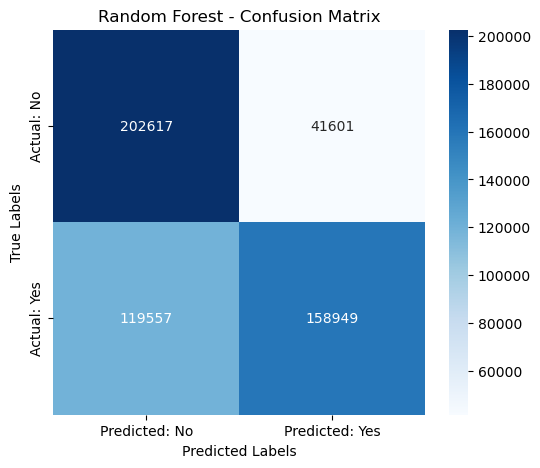

In [64]:
# 8. Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, rf_y_pred)

# Print confusion matrix
print("\nRandom Forest - Confusion Matrix:")
print(cm)

# Optional: Visualizing the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()